In [5]:
# for database connections
import sqlalchemy
from sqlalchemy import create_engine, inspect, text

# data
import pandas as pd
import numpy as np

# viz
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
SQL_USERNAME = "postgres"
SQL_PASSWORD = "postgres" # change this
SQL_IP = "localhost"
PORT = 5432
DATABASE = "Project_2_group_08" # change this

In [7]:
connection_string = f"postgresql+psycopg2://{SQL_USERNAME}:{SQL_PASSWORD}@{SQL_IP}:{PORT}/{DATABASE}"
engine = create_engine(connection_string)

In [8]:
# explore and understand the data

# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

# Using the inspector to print the column names within each table and its types
for table in tables:
    print(table)
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])
        
    print()

category
category_id TEXT
category_name TEXT

subcategory
subcategory_id TEXT
subcategory_name TEXT

contacts
contact_id BIGINT
email TEXT
first_name TEXT
last_name TEXT

campaign
cf_id BIGINT
contact_id BIGINT
company_name TEXT
description TEXT
goal DOUBLE PRECISION
pledged DOUBLE PRECISION
outcome TEXT
backers_count BIGINT
country TEXT
currency TEXT
launch_date TEXT
end_date TEXT
category_id TEXT
subcategory_id TEXT



In [ ]:
#sabina query

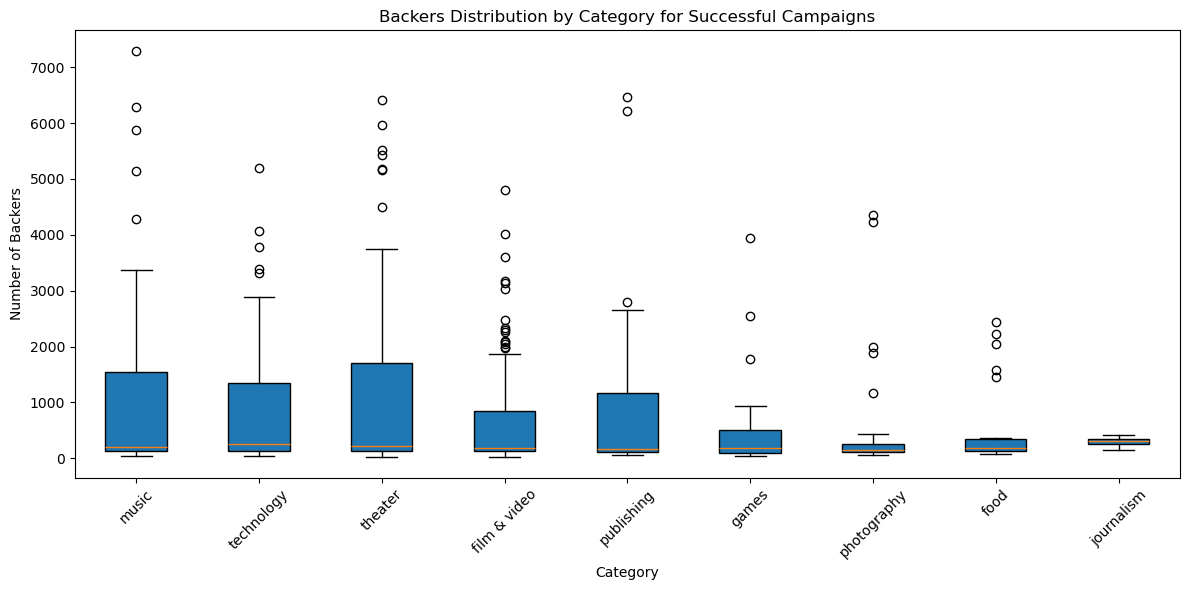

In [10]:
#seven query

# Load the data from the provided CSV files
campaign_df = pd.read_csv('Resources/campaign.csv')
category_df = pd.read_csv('Resources/category.csv')

# Merging campaign data with category data to get category names
campaign_category_df = campaign_df.merge(category_df, on='category_id')

# Filtering the data for successful campaigns
successful_campaigns_df = campaign_category_df[campaign_category_df['outcome'] == 'successful']

# Plotting the box plot for backers distribution by category for successful campaigns
plt.figure(figsize=(12, 6))
plt.boxplot(
    [successful_campaigns_df[successful_campaigns_df['category_name'] == category]['backers_count'] 
     for category in successful_campaigns_df['category_name'].unique()],
    labels=successful_campaigns_df['category_name'].unique(),
    patch_artist=True
)
plt.xlabel('Category')
plt.ylabel('Number of Backers')
plt.title('Backers Distribution by Category for Successful Campaigns')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:
# Insights:
# Popularity of Categories:

# Categories like "Technology" and "Film & Video" appear to be more popular among backers, as evidenced by their higher median and 
# broader spread of backer counts. This could indicate a higher interest or more compelling campaign content in these categories.

# Consistency in Backers:
# Categories with narrower boxes and shorter whiskers, such as "Theater" and "Food," show more consistency in the number of backers. 
# Successful campaigns in these categories attract a more uniform number of supporters.
# Potential for Exceptional Success:

# The presence of outliers in certain categories, particularly "Technology" and "Film & Video," suggests that while many campaigns 
# attract a moderate number of backers, there are standout campaigns that achieve exceptional success in attracting a large number 
# of backers.

# Conclusion:
# This box plot reveals that while some categories consistently attract a certain number of backers for successful campaigns, others 
# have the potential for both high variability and exceptional success. Categories like "Technology" and "Film & Video" stand out for 
# their higher median backers and presence of outliers, indicating a potential for high engagement.


In [ ]:
#hannah query